 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df.head()

/var/folders/jf/lcpt8z3d2gb1_qpgt0d_xdw00000gn/T/ipykernel_14436/2352692855.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_df = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df = whale_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.head()

/var/folders/jf/lcpt8z3d2gb1_qpgt0d_xdw00000gn/T/ipykernel_14436/383156133.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_df = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df = algo_df.dropna()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df.head()

/var/folders/jf/lcpt8z3d2gb1_qpgt0d_xdw00000gn/T/ipykernel_14436/1196722473.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
/var/folders/jf/lcpt8z3d2gb1_qpgt0d_xdw00000gn/T/ipykernel_14436/1196722473.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [11]:
# Calculate Daily Returns
daily_returns_sp500 = sp500_df.pct_change()
daily_returns_sp500.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
daily_returns_sp500 = daily_returns_sp500.dropna()

In [13]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_sp500 = daily_returns_sp500.rename(columns={"Close": "SP500"})
daily_returns_sp500.head()

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_df = pd.concat([whale_df, algo_df, daily_returns_sp500], axis="columns", join="inner")
joined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

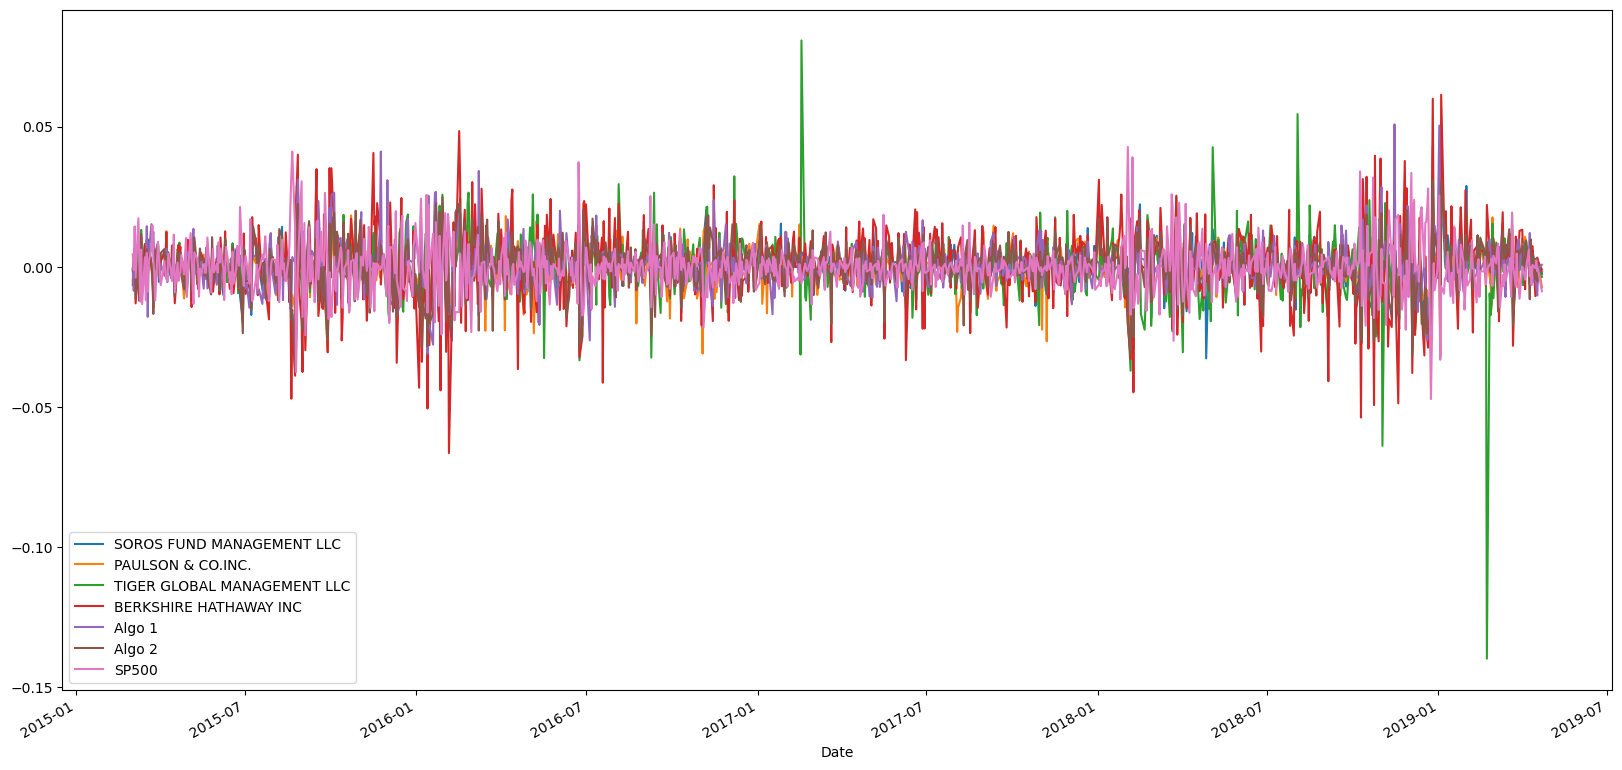

In [15]:
# Plot daily returns of all portfolios
joined_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

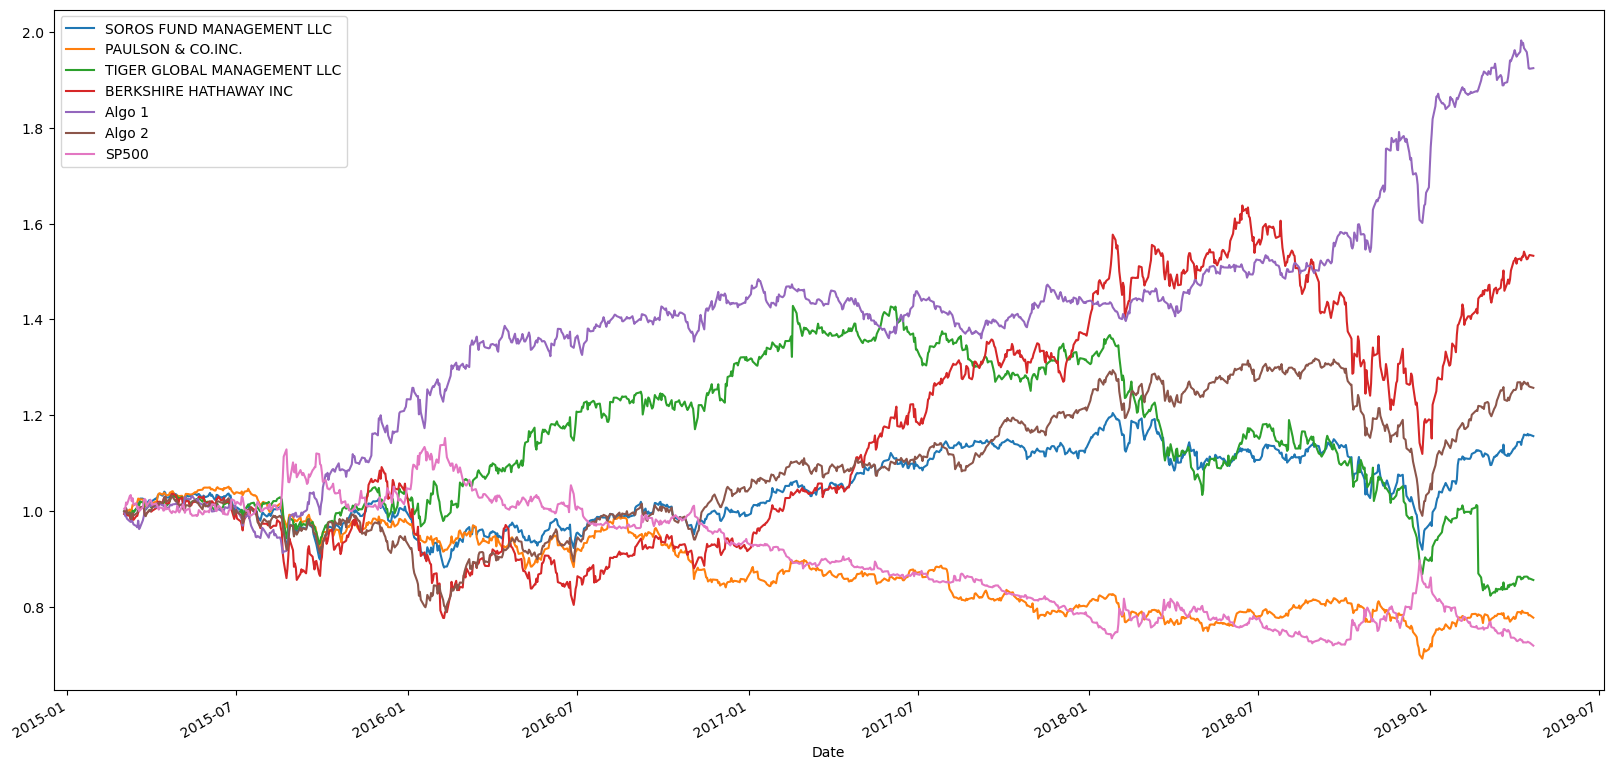

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

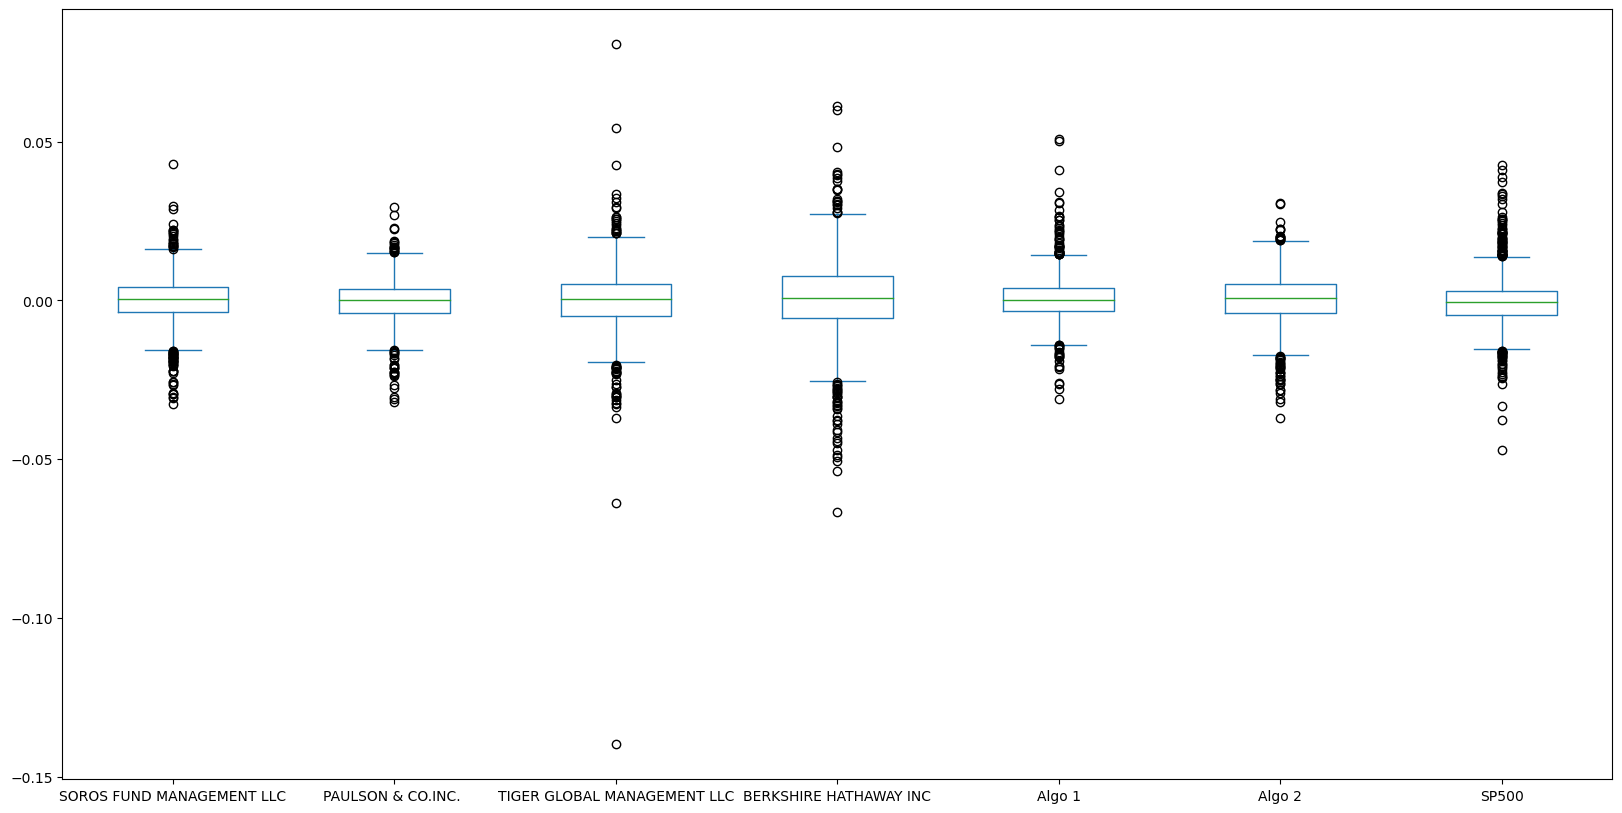

In [17]:
# Box plot to visually show risk
joined_df.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_std = joined_df.std()
daily_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
SP500                          0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = daily_std['SP500']
sp500_std

0.00858688974707399

In [20]:
# Determine which portfolios are riskier than the S&P 500
daily_std = daily_std.sort_values(ascending=False)
riskier_portfolios = daily_std[daily_std > sp500_std]
riskier_portfolios

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
dtype: float64

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
SP500                          0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

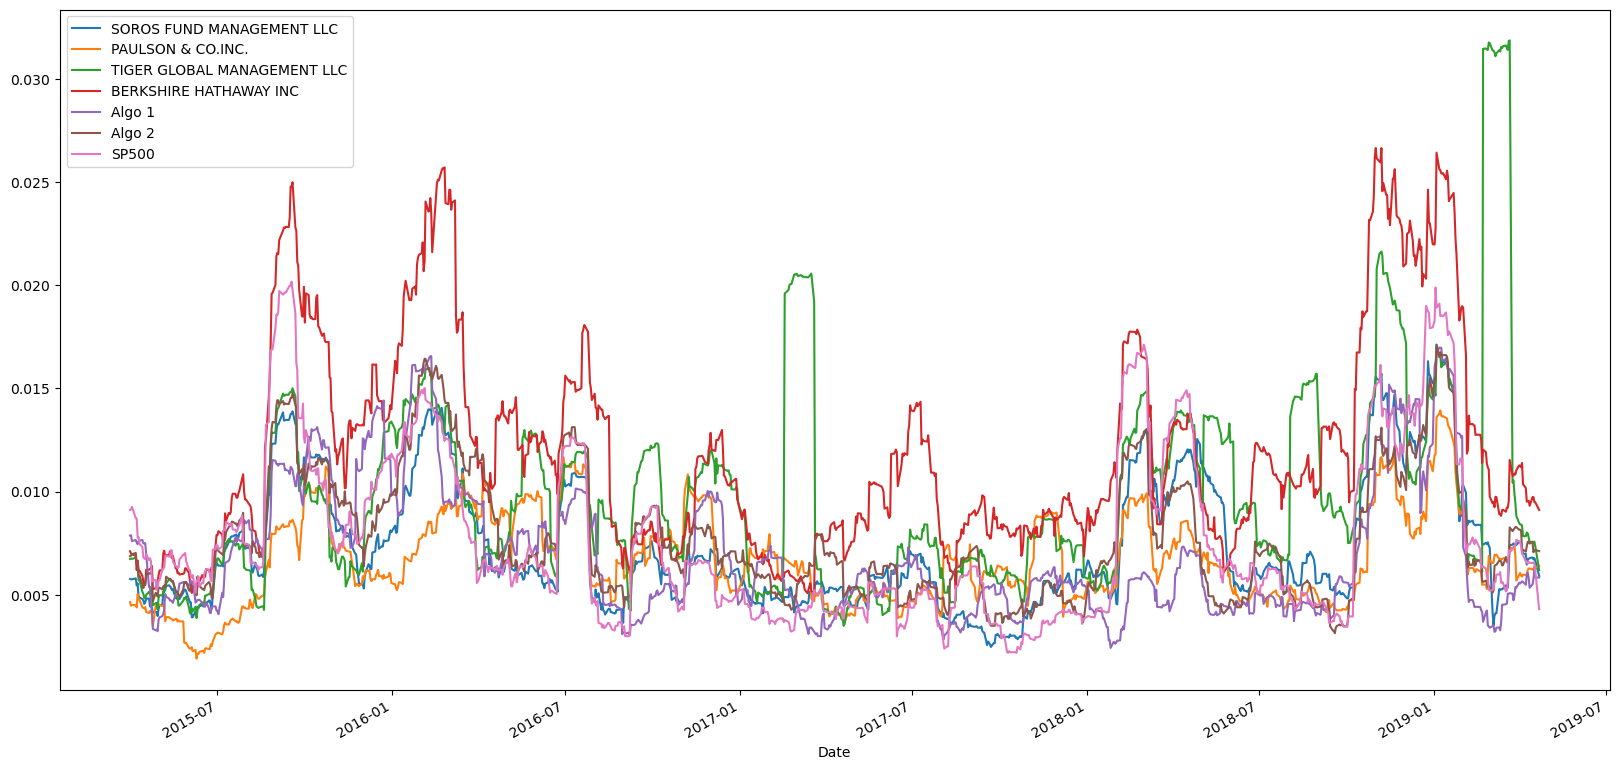

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = joined_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

In [23]:
# Calculate the correlation
correlation = rolling_std.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.664526,0.451455,0.859050,0.721419,0.872868,0.895536
PAULSON & CO.INC.,0.664526,1.000000,0.407718,0.631143,0.585529,0.688516,0.581447
TIGER GLOBAL MANAGEMENT LLC,0.451455,0.407718,1.000000,0.412728,0.265495,0.359271,0.407194
BERKSHIRE HATHAWAY INC,0.859050,0.631143,0.412728,1.000000,0.794150,0.824796,0.799674
Algo 1,0.721419,0.585529,0.265495,0.794150,1.000000,0.760948,0.684632
Algo 2,0.872868,0.688516,0.359271,0.824796,0.760948,1.000000,0.890712
SP500,0.895536,0.581447,0.407194,0.799674,0.684632,0.890712,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: xlabel='Date'>

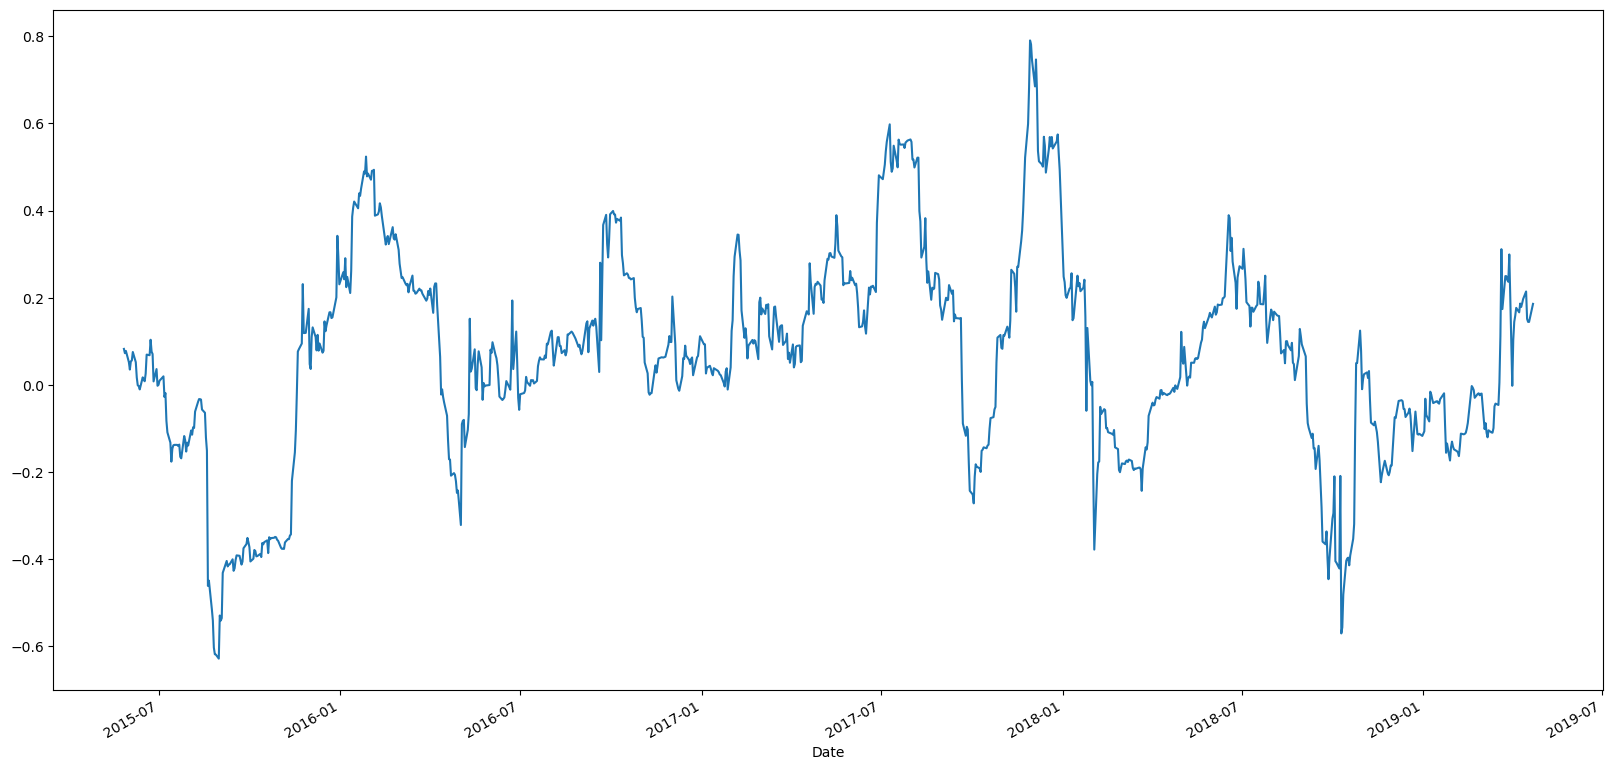

In [24]:
# Calculate covariance of a single portfolio
berkshire_cov = joined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(joined_df['SP500'])
# Calculate variance of S&P 500
sp500_var = joined_df['SP500'].rolling(window=60).var()
# Computing beta
berkshire_beta = berkshire_cov / sp500_var
# Plot beta trend
berkshire_beta.plot(figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [25]:
# Use `ewm` to calculate the rolling window
ewm = joined_df.ewm(span=21).std()
ewm.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003962
2015-03-05,0.002658,0.004896,0.002519,0.006934,0.004182,0.002645,0.008098
2015-03-06,0.005515,0.004592,0.004808,0.009585,0.003386,0.007399,0.008345
2015-03-09,0.004716,0.004434,0.005702,0.008103,0.002929,0.006422,0.009712


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratios = (joined_df.mean() * 252) / (joined_df.std() * np.sqrt(252))
sharpe_ratios.sort_values(ascending=False)

Algo 1                         1.369589
BERKSHIRE HATHAWAY INC         0.606743
Algo 2                         0.484334
SOROS FUND MANAGEMENT LLC      0.342894
TIGER GLOBAL MANAGEMENT LLC   -0.130186
PAULSON & CO.INC.             -0.491422
SP500                         -0.518582
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

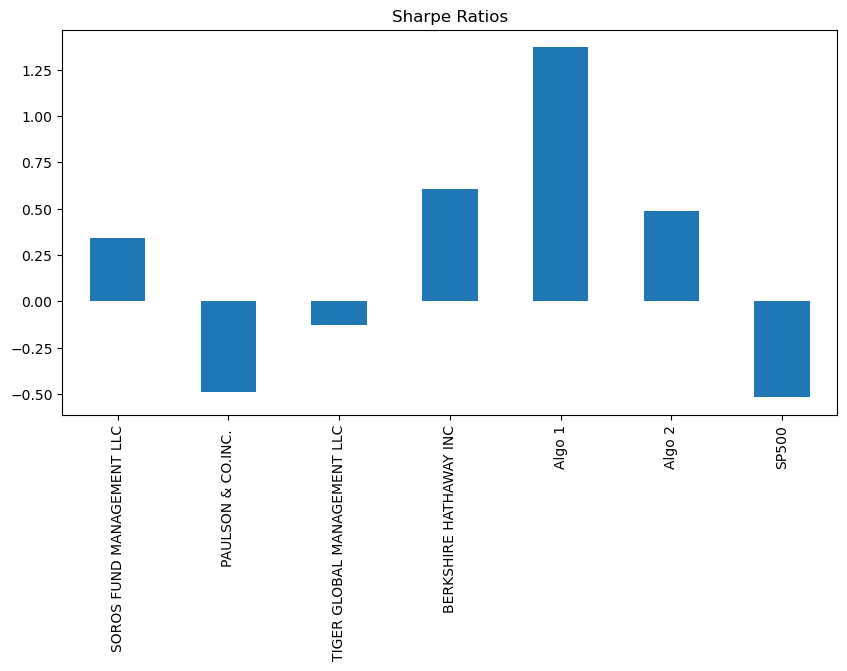

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", figsize=(10,5))

In [28]:
algo_strategy = sharpe_ratios['Algo 1'] + sharpe_ratios['Algo 2']
others = sharpe_ratios.sum() - algo_strategy
algo_strategy, others


(1.8539232832487798, -0.19055477391512832)

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.



In [29]:
print(f'Yes, The Algo Strategies outperformed all other portfolios combined.')
print(f'    Algo strategies combined sharpe ratio = {algo_strategy}')
print(f'    SP500 and Whales combined sharpe ratio = {others}')

Yes, The Algo Strategies outperformed all other portfolios combined.
    Algo strategies combined sharpe ratio = 1.8539232832487798
    SP500 and Whales combined sharpe ratio = -0.19055477391512832


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
# Reading data from 1st stock
nvda_df= pd.read_csv(Path("/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 4 challenge/Resources/nvda.csv"))
nvda_df.set_index(pd.to_datetime(nvda_df['Date'], infer_datetime_format=True), inplace=True)
nvda_df = nvda_df.drop(columns=['Date'])
nvda_df.head()

/var/folders/jf/lcpt8z3d2gb1_qpgt0d_xdw00000gn/T/ipykernel_14436/738575488.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  nvda_df.set_index(pd.to_datetime(nvda_df['Date'], infer_datetime_format=True), inplace=True)


,Close
Date,
2015-01-02 16:00:00,5.03
2015-01-05 16:00:00,4.95
2015-01-06 16:00:00,4.80
2015-01-07 16:00:00,4.78
2015-01-08 16:00:00,4.97


In [32]:
# Reading data from 2nd stock
mara_df = pd.read_csv(Path("/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 4 challenge/Resources/MARA.csv"))
mara_df.set_index(pd.to_datetime(mara_df['Date'], infer_datetime_format=True), inplace=True)
mara_df = mara_df.drop(columns=['Date'])
mara_df.head()


/var/folders/jf/lcpt8z3d2gb1_qpgt0d_xdw00000gn/T/ipykernel_14436/2846564159.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  mara_df.set_index(pd.to_datetime(mara_df['Date'], infer_datetime_format=True), inplace=True)


,Close
Date,
2015-01-02 16:00:00,133.76
2015-01-05 16:00:00,126.72
2015-01-06 16:00:00,124.96
2015-01-07 16:00:00,134.88
2015-01-08 16:00:00,129.44


In [33]:
# Reading data from 3rd stock   
mstr_df = pd.read_csv(Path("/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 4 challenge/Resources/MSTRY.csv"))
mstr_df.set_index(pd.to_datetime(mstr_df['Date'], infer_datetime_format=True), inplace=True)
mstr_df = mstr_df.drop(columns=['Date'])
mstr_df.head()  


/var/folders/jf/lcpt8z3d2gb1_qpgt0d_xdw00000gn/T/ipykernel_14436/3366803818.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  mstr_df.set_index(pd.to_datetime(mstr_df['Date'], infer_datetime_format=True), inplace=True)


,Close
Date,
2015-01-02 16:00:00,163.12
2015-01-05 16:00:00,162.98
2015-01-06 16:00:00,157.97
2015-01-07 16:00:00,158.00
2015-01-08 16:00:00,162.41


In [34]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([nvda_df, mara_df, mstr_df], axis="columns", join="inner")
combined_df.head()

,Close,Close,Close
Date,,,
2015-01-02 16:00:00,5.03,133.76,163.12
2015-01-05 16:00:00,4.95,126.72,162.98
2015-01-06 16:00:00,4.80,124.96,157.97
2015-01-07 16:00:00,4.78,134.88,158.00
2015-01-08 16:00:00,4.97,129.44,162.41


In [35]:
# Reset Date index
combined_df.index = combined_df.index.date

In [36]:
# Reorganize portfolio data by having a column per symbol
combined_df.columns = ['NVDA', 'MARA', 'MSTR']
combined_df.head()

,NVDA,MARA,MSTR
2015-01-02,5.03,133.76,163.12
2015-01-05,4.95,126.72,162.98
2015-01-06,4.80,124.96,157.97
2015-01-07,4.78,134.88,158.00
2015-01-08,4.97,129.44,162.41


In [39]:
# Calculate daily returns
daily_returns_df = combined_df.pct_change()
sp500_daily_returns = sp500_df.pct_change()
# Drop NAs
daily_returns_df = daily_returns_df.dropna()

# Display sample data
display(daily_returns_df.head())

,NVDA,MARA,MSTR
2015-01-05,-0.015905,-0.052632,-0.000858
2015-01-06,-0.030303,-0.013889,-0.030740
2015-01-07,-0.004167,0.079385,0.000190
2015-01-08,0.039749,-0.040332,0.027911
2015-01-09,0.004024,-0.028430,-0.017179


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [40]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns_df.dot(weights)
# Display sample data
portfolio_returns.head()

2015-01-05   -0.023131
2015-01-06   -0.024977
2015-01-07    0.025136
2015-01-08    0.009109
2015-01-09   -0.013862
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [41]:
# Join your returns DataFrame to the original returns DataFrame
joined_df['My Portfolio'] = portfolio_returns
returns_df = joined_df
returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,My Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.001287
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.008299
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,-0.002710
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.026796
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,-0.012385


In [42]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
returns_df = returns_df.dropna()
returns_df.head(20)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,My Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.001287
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.008299
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,-0.002710
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.026796
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,-0.012385
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921,-0.017194
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.012445,0.002585
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.006112,0.015318
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.013353,-0.008342


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [43]:
# Calculate the annualized `std`
std = returns_df.std() * np.sqrt(252)
std

SOROS FUND MANAGEMENT LLC      0.125532
PAULSON & CO.INC.              0.111243
TIGER GLOBAL MANAGEMENT LLC    0.160444
BERKSHIRE HATHAWAY INC         0.204849
Algo 1                         0.120431
Algo 2                         0.132679
SP500                          0.137017
My Portfolio                   0.567867
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

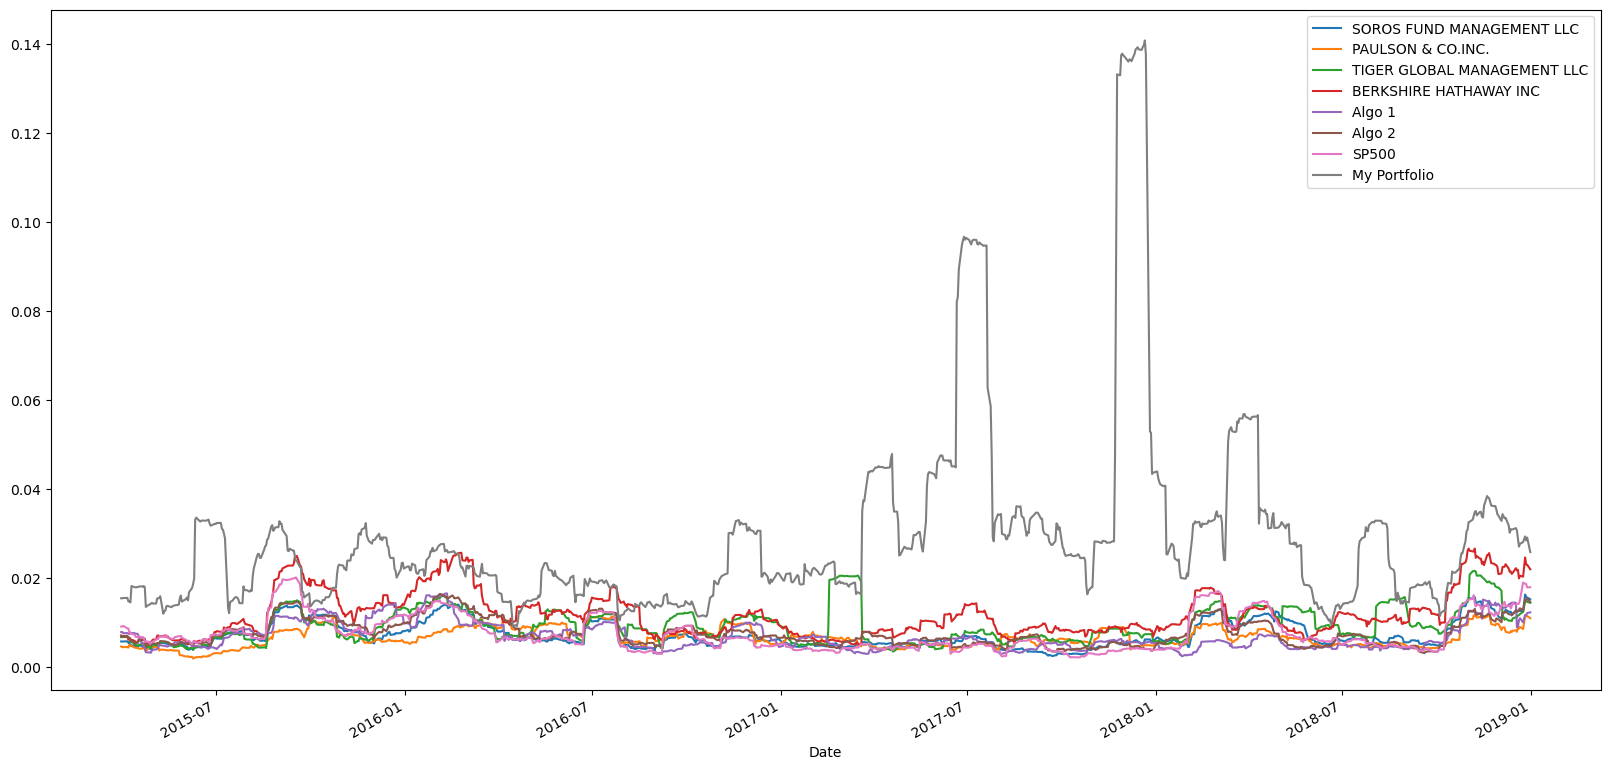

In [44]:
# Calculate rolling standard deviation
rolling_std_df = returns_df.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std_df.plot(figsize=(20,10))

### Calculate and plot the correlation

In [45]:
# Calculate and plot the correlation
correlation_df = returns_df.corr()
correlation_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.695619,0.605041,0.754396,0.335722,0.827702,-0.004137,0.293719
PAULSON & CO.INC.,0.695619,1.000000,0.468031,0.540224,0.267174,0.671442,0.011661,0.247253
TIGER GLOBAL MANAGEMENT LLC,0.605041,0.468031,1.000000,0.476361,0.184670,0.563004,-0.006481,0.174753
BERKSHIRE HATHAWAY INC,0.754396,0.540224,0.476361,1.000000,0.306683,0.682083,-0.020412,0.276054
Algo 1,0.335722,0.267174,0.184670,0.306683,1.000000,0.289346,-0.040746,0.119194
Algo 2,0.827702,0.671442,0.563004,0.682083,0.289346,1.000000,-0.007202,0.307044
SP500,-0.004137,0.011661,-0.006481,-0.020412,-0.040746,-0.007202,1.000000,-0.025235
My Portfolio,0.293719,0.247253,0.174753,0.276054,0.119194,0.307044,-0.025235,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: xlabel='Date'>

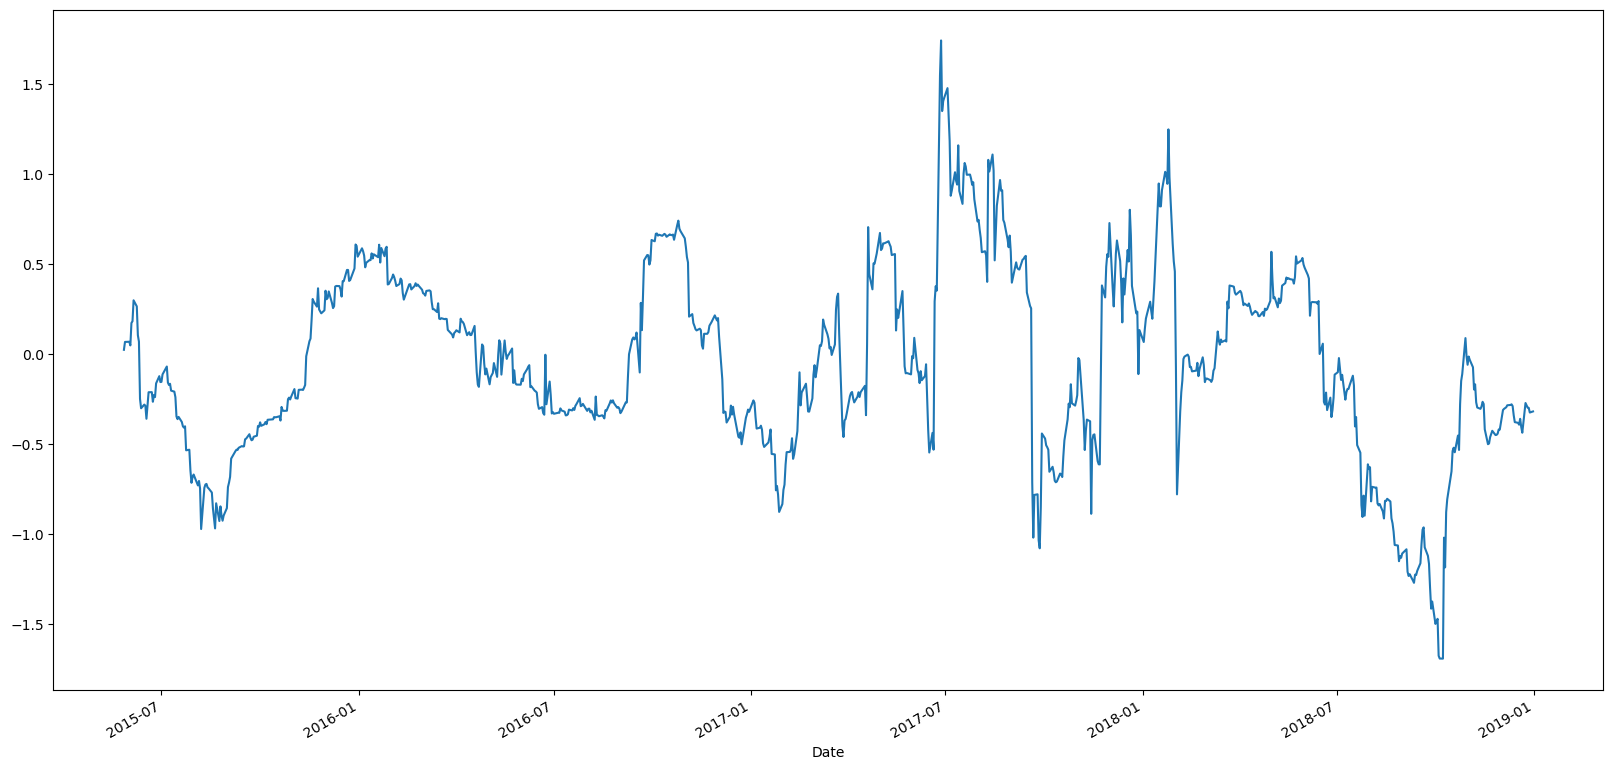

In [46]:
# Calculate and plot Beta
covariance = returns_df['My Portfolio'].rolling(window=60).cov(joined_df['SP500'])
variance = joined_df['SP500'].rolling(window=60).var()
beta = covariance / variance
beta.plot(figsize=(20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (returns_df.mean() * 252) / (returns_df.std() * np.sqrt(252))
sharpe_ratios.sort_values(ascending=False)

Algo 1                         1.178831
BERKSHIRE HATHAWAY INC         0.325599
My Portfolio                   0.185757
Algo 2                         0.140793
SOROS FUND MANAGEMENT LLC      0.000127
TIGER GLOBAL MANAGEMENT LLC   -0.099093
SP500                         -0.264278
PAULSON & CO.INC.             -0.744129
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

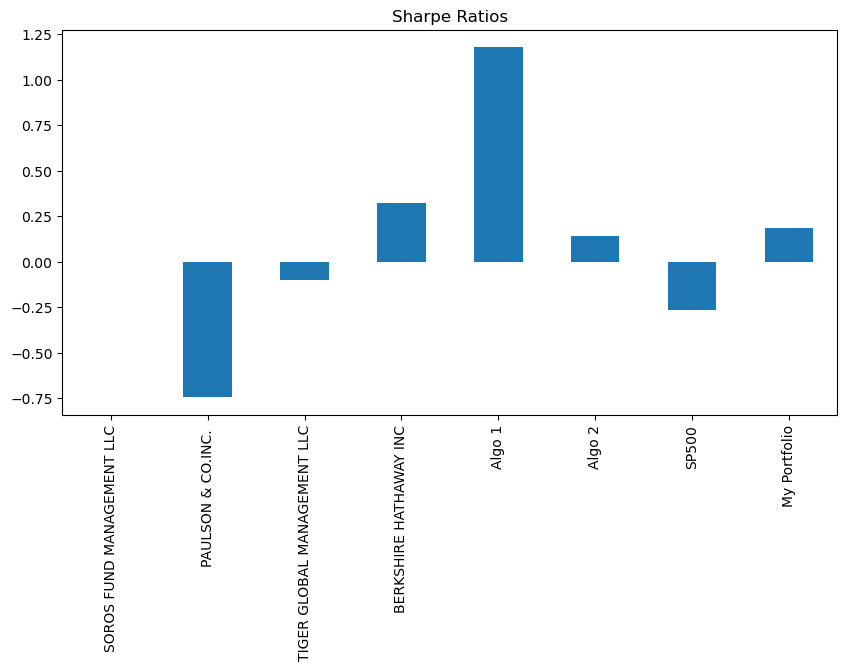

In [48]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", figsize=(10,5))

### How does your portfolio do?

Write your answer here!

My Portfolio was the third best performing portfolio out of all the combined portolios 